## 1. ORB (Oriented FAST and Rotated BRIEF)
#### ORB는 특징점을 추출하는 알고리즘
#### Python에서 제공하는 랜덤 노이즈 이미지를 사용해서 특징점을 찾는 예제

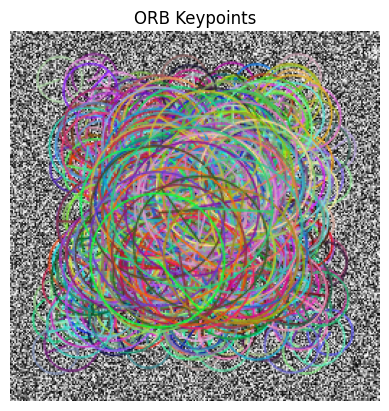

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 노이즈 이미지 생성 (256x256)
image = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# ORB 객체 생성
orb = cv2.ORB_create()

# 특징점 검출 및 디스크립터 계산
keypoints, descriptors = orb.detectAndCompute(image, None)

# 특징점 시각화
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
plt.imshow(image_with_keypoints, cmap="gray")
plt.axis("off")
plt.title("ORB Keypoints")
plt.show()


## SIFT (Scale-Invariant Feature Transform) 알고리즘
#### SIFT는 크기(Scale), 회전(Rotation), 밝기 변화에 강한 특징점 검출 및 매칭 알고리즘
#### 이미지에서 특징점(Keypoints)을 추출하고, 이를 비교하여 객체 인식을 수행하는 데 사용

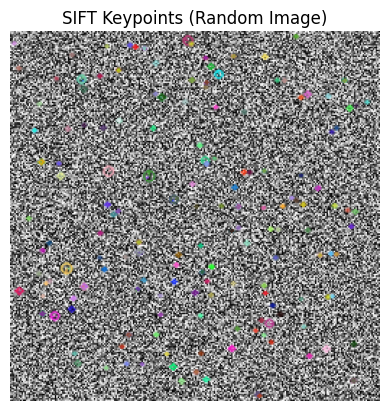

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 랜덤 이미지 생성 (256x256 크기, 0~255 범위의 값)
image = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# SIFT 객체 생성
sift = cv2.SIFT_create()

# 특징점 검출 및 디스크립터 계산
keypoints, descriptors = sift.detectAndCompute(image, None)

# 특징점 시각화
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, 
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
plt.imshow(image_with_keypoints, cmap="gray")
plt.axis("off")
plt.title("SIFT Keypoints (Random Image)")
plt.show()


## 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)
#### CLAHE는 명암 대비를 자동으로 조정해주는 기법
#### 그라디언트 이미지를 생성해서 적용

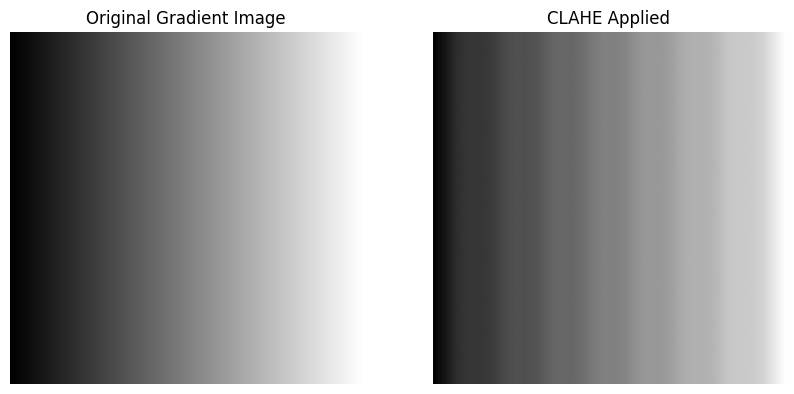

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 그라디언트 이미지 생성 (256x256)
x = np.linspace(0, 255, 256, dtype=np.uint8)
image = np.tile(x, (256, 1))

# CLAHE 객체 생성
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# CLAHE 적용
clahe_image = clahe.apply(image)

# 결과 비교
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Gradient Image")
ax[0].axis("off")

ax[1].imshow(clahe_image, cmap="gray")
ax[1].set_title("CLAHE Applied")
ax[1].axis("off")

plt.show()


## 3. Deconvolution (복원 필터링)
#### 디컨볼루션(복원 필터링)은 블러 이미지를 복원하는 기법
#### 가우시안 블러를 추가한 후 복원하는 예제

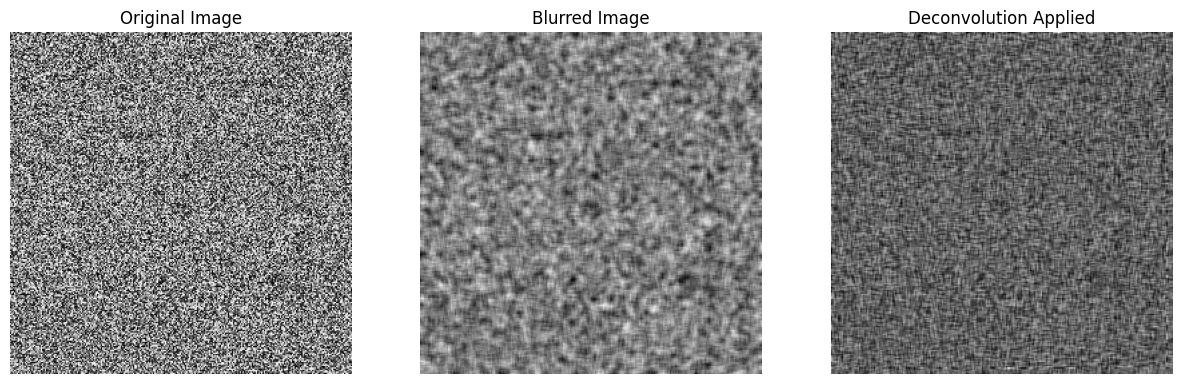

In [3]:
import cv2
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# 원본 이미지 (랜덤 패턴)
image = np.random.randint(0, 256, (256, 256), dtype=np.uint8)

# 가우시안 블러 커널 생성
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

# 블러 처리된 이미지 생성
blurred = cv2.filter2D(image, -1, kernel)

# Wiener 필터를 이용한 복원 (Deconvolution)
def wiener_filter(img, kernel, K=0.01):
    kernel /= np.sum(kernel)  # 커널 정규화
    dummy = np.fft.fft2(img)  # 푸리에 변환
    kernel = np.fft.fft2(kernel, s=img.shape)  # 커널 푸리에 변환
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)  # 위너 필터 공식
    dummy = dummy * kernel  # 필터 적용
    dummy = np.fft.ifft2(dummy)  # 역푸리에 변환
    return np.abs(dummy)

# 복원 수행
restored = wiener_filter(blurred, kernel)

# 결과 비교
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(blurred, cmap="gray")
ax[1].set_title("Blurred Image")
ax[1].axis("off")

ax[2].imshow(restored, cmap="gray")
ax[2].set_title("Deconvolution Applied")
ax[2].axis("off")

plt.show()
